In [5]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

0.6394267984578837

0.13436424411240122

In [14]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('../Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

          Type  Combined_MPG                           Make_Model
0  Two Seaters       21.0000                            Acura_NSX
1  Two Seaters       27.9406                        ALFA ROMEO_4C
2  Two Seaters       20.9455  Aston Martin Lagonda Ltd_Vantage V8
3  Two Seaters       25.9952             Audi_TT Roadster quattro
4  Two Seaters       27.6300                     BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


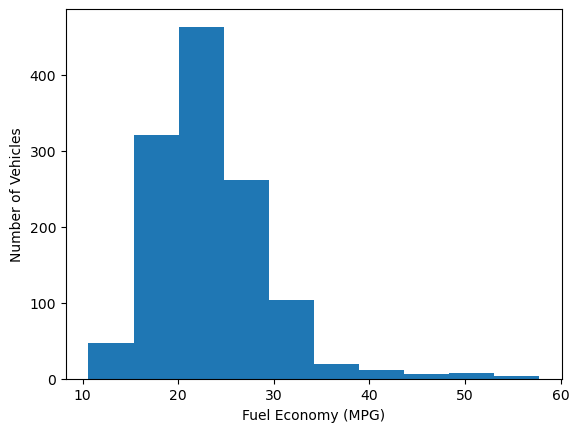

In [15]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy['Combined_MPG'].std(),2)}")
plt.hist(fuel_economy['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


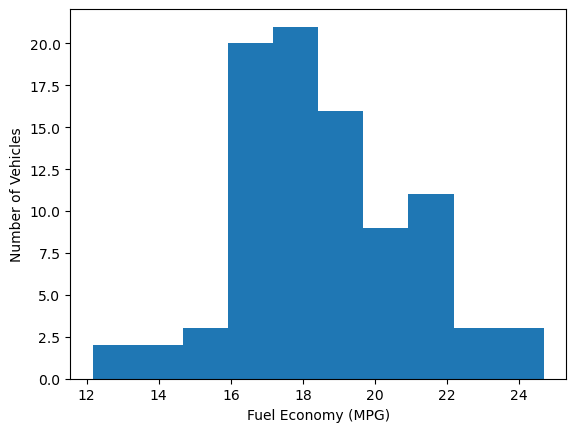

In [16]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 23.84
The standard deviation of all vehicle's MPG is: 5.81


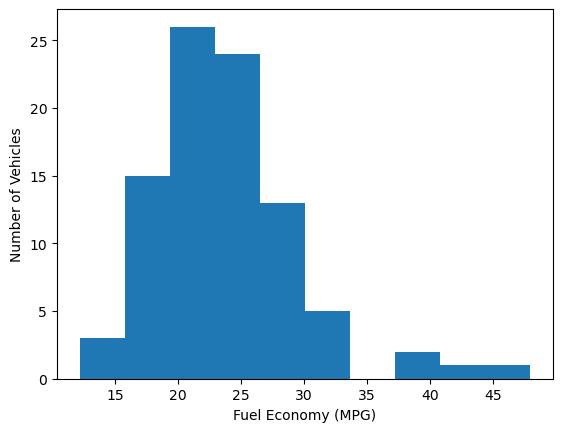

In [34]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90, random_state=42)
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [33]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30,random_state=42)
print(f"The SEM value for the sample fuel economy data is {sem(sample['Combined_MPG'])}")

The SEM value for the sample fuel economy data is 1.0841046389538003


In [19]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]
vehicle_sample_set

[                             Type  Combined_MPG  \
 472                  Midsize Cars       23.3780   
 247               Subcompact Cars       15.2813   
 460                  Midsize Cars       25.0000   
 685                    Large Cars       22.5477   
 56                    Two Seaters       26.7683   
 1166             Standard SUV 4WD       16.6887   
 122              Minicompact Cars       21.8000   
 788   Standard Pick-up Trucks 2WD       20.0462   
 144               Subcompact Cars       24.0356   
 180               Subcompact Cars       15.5654   
 1190             Standard SUV 4WD       22.6844   
 1239             Standard SUV 4WD       19.2827   
 845   Standard Pick-up Trucks 4WD       16.9795   
 400                  Midsize Cars       27.4016   
 201               Subcompact Cars       22.4496   
 961                 Small SUV 2WD       27.0000   
 914                 Small SUV 2WD       24.5154   
 325                  Compact Cars       31.8592   
 1004       

In [22]:
# Generate the plot data for each sample 
means = [sample['Combined_MPG'].mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample['Combined_MPG']) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

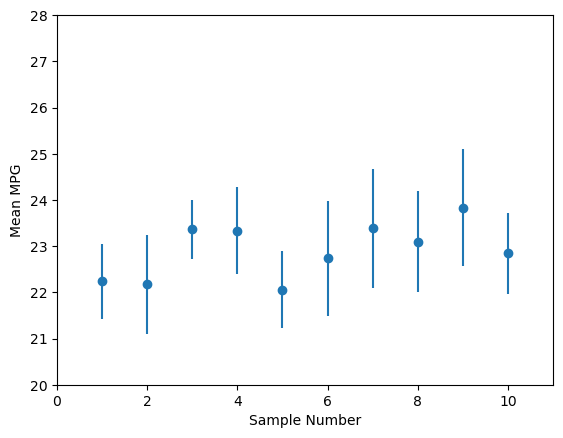

In [23]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()